# Libraries

In [1]:
import numpy as np
import random as r
from math import pi,gamma
import matplotlib.pyplot as plt
np.random.seed(3112163)

## Παραδοτέο 1
1. Έχουμε, $$\sum^\infty_{k=0} \frac{k}{2^{k+1}} = \frac{1}{2}\sum^\infty_{k=0} \frac{k}{2^{k}} = \frac{1}{2}\sum^\infty_{k=0} k (\frac{1}{2})^k $$
 Ομώς γνωρίζουμε ότι, $$\sum^\infty_{k=0} k c^k  = \frac{c}{(1-c)^2}\ ,|c|< 1$$
 Άρα,$$ \frac{1}{2}\sum^\infty_{k=0} k (\frac{1}{2})^k = \frac{1}{2} \frac{\frac{1}{2}}{(1-\frac{1}{2})^2} = 1 $$
 Επιπλέον το σφάλμα φαίνεται στο παρακάτω figure.

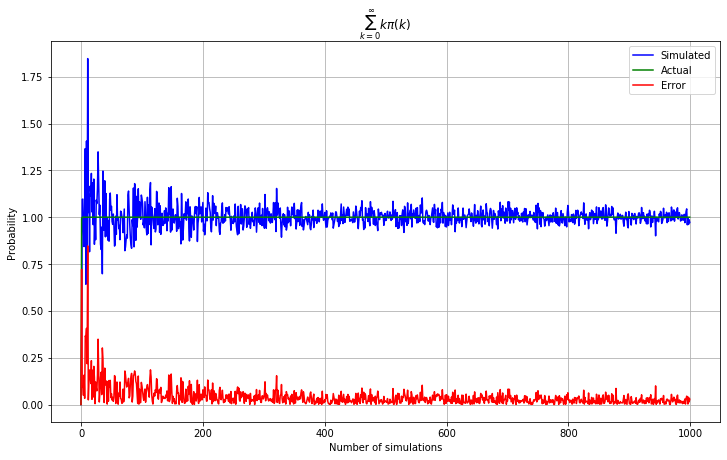

<Figure size 432x288 with 0 Axes>

The simulated ergodic average [X1+X2+X3+...+XN]/N is: 0.9717
The real ergodic average is: 1.0000


In [2]:
def random_walk_next(state):
    if np.random.uniform() < 0.5:
        return 0
    return state + 1
def pik(k): return k/2**(k+1)

NA = 10**4
Sim = []
Real = []
Error = []
for N in range(1,NA,10):
    running_state = 0
    sum_result = 0
    
    for i in range(N):
        running_state = random_walk_next(running_state)
        sum_result += running_state

    realMath = sum([pik(k) for k in range(N)])
    Sim.append(sum_result/N)
    Real.append(realMath)
    Error.append(abs( sum_result/N - realMath ) )


plt.figure(figsize=(12, 7))
plt.subplot()
plt.plot(Sim, color = 'b', label = 'Simulated')
plt.plot(Real, color = 'g', label = 'Actual')
plt.plot(Error, color = 'r', label = 'Error')
plt.xlabel(r'Number of simulations')
plt.ylabel(r'Probability')
plt.title(r'$\sum^\infty_{k=0}k\pi (k)$')
plt.legend()
plt.grid()
plt.show()
plt.cla()
plt.clf()



### Ergodic Limit Theorem
print("The simulated ergodic average [X1+X2+X3+...+XN]/N is: %.4f" % (sum_result / N))
print("The real ergodic average is: %.4f" % (realMath))

2. Το variance ειναι:

In [3]:
result = []
for _ in range(50):
    N = 10**4
    running_state = 0
    sum_result = 0

    for i in range(N):
        running_state = random_walk_next(running_state)
        sum_result += running_state
    result.append(sum_result / N)
firstVar = np.var(result)
print("The simulated ergodic variance is: %.6f" % (firstVar))

The simulated ergodic variance is: 0.000593


3. Παρακάτω φαίνεται ότι για να μειωθεί το variance στο μισό χρειάζονται περίπου 6 φορές περισσότερα δείγματα.

In [4]:
result = []
for _ in range(50):
    N = 10**4
    running_state = 0
    sum_result = 0

    for i in range(N):
        running_state = random_walk_next(running_state)
        sum_result += running_state
    result.append(sum_result / N)
firstVar = np.var(result)
result = []
j = 0
while True:
    j+=1
    for _ in range(50):
        N = j*10**4
        running_state = 0
        sum_result = 0

        for i in range(N):
            running_state = random_walk_next(running_state)
            sum_result += running_state
        result.append(sum_result / N)
    if (np.var(result) <= firstVar/2): break

print("For half variance we need {} times N samples".format(j))

For half variance we need 6 times N samples


4. Παρακάτω υπολογίζουμε το ακόλουθο άθροισμα, $$ \sum_{k=0}^{\infty} \frac{\cos(k + \cos(k))}{2^k} $$

In [5]:
N = 10000
running_state = 0
sum_result = 0

for i in range(N):
    running_state = random_walk_next(running_state)
    sum_result += 2*np.cos(running_state + np.cos(running_state) )

real = sum([np.cos(k + np.cos(k))/(2**k) if k<=1000 else 0 for k in range(N)])
### Ergodic Limit Theorem
print("The simulated ergodic average [F(X1)+F(X2)+F(X3)+...+F(XN)]/N is: %.4f" % (sum_result / N))
print("The Real ergodic average is: {}".format(real))

The simulated ergodic average [F(X1)+F(X2)+F(X3)+...+F(XN)]/N is: 0.4739
The Real ergodic average is: 0.4666448132897685


## Παραδοτέο 2
Εδώ κάνουμε κάποιες μικρές διορθώσεις στον κώδικα του προηγούμενου εργαστηρίου.

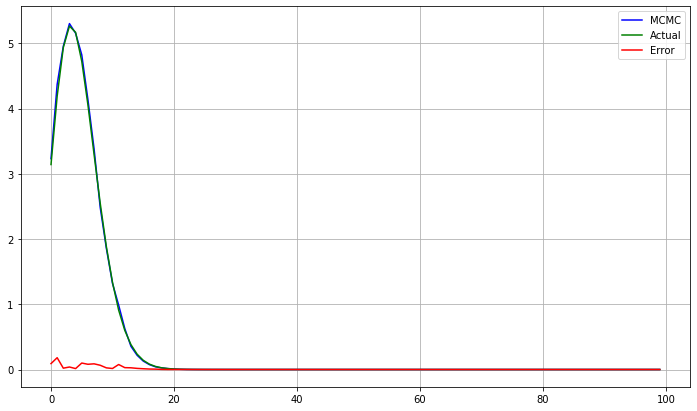

MCMC : 
 [3.23200000e+00 4.36966400e+00 4.95519898e+00 5.30206290e+00
 5.15360514e+00 4.82377441e+00 4.13879845e+00 3.38553713e+00
 2.48498425e+00 1.85876822e+00 1.31972544e+00 9.87154627e-01
 6.27830343e-01 3.55351974e-01 2.18186112e-01 1.29166178e-01
 7.49163834e-02 4.09043454e-02 2.40517551e-02 1.42386390e-02
 6.97693311e-03 3.20938923e-03 1.43780638e-03 7.53410541e-04
 3.49582491e-04 1.56612956e-04 7.17287338e-05 3.39994198e-05
 1.48917459e-05 7.14803802e-06 3.11654458e-06 1.25285092e-06
 4.58543437e-07 1.65075637e-07 6.30588934e-08 2.54757930e-08
 9.73175291e-09 3.62021208e-09 1.28879550e-09 4.76854335e-10
 1.89788025e-10 6.90828413e-11 2.50079885e-11 9.45301967e-12
 3.34636896e-12 1.12437997e-12 4.07025550e-13 1.40830840e-13
 4.81641473e-14 1.62794818e-14 5.79549552e-15 1.87774055e-15
 6.42187268e-16 1.92656180e-16 5.00906069e-17 1.67302627e-17
 4.91869723e-18 1.40674741e-18 4.30464707e-19 1.20530118e-19
 3.13378307e-20 8.64924127e-21 2.38719059e-21 5.58602598e-22
 1.72049600e-22

<Figure size 432x288 with 0 Axes>

In [6]:

def Vol1(d):
    x = d/2
    return (pi ** x) / gamma(x + 1)

delta = 1.0
N = 100 # number of steps to approach equilibrium
samples = 1000 
Omega = 2
Mcmc = []
Actual = []
Error = []
for d in range(1,101):
    nhits = 0
    for _ in range(samples):
        x = [0 for i in range(d)]  ## start at the centre of th disc. This variable will keep the position of the chain
        R_sq = 0.0  ## this variable keeps the squared distance from 0. It saves some computations to keep it

        for _ in range(N):
            k = r.choice(range(d))  ## choose a jump direction at random
            z = r.uniform(-delta,delta) ## choose a jump size uniformly in (-delta,delta)
            x_prop_k = x[k] + z   ## propose a jump by z in the direction k
            R_sqprop = R_sq - x[k]**2+ x_prop_k**2 ## compute the squared distance from 0 after the proposed jump 
            if R_sqprop < 1.0: 
                R_sq = R_sqprop
                x[k]= x_prop_k   ## if the proposed jump leads to a point in the disc, then jump
        x_d_next = r.uniform(-delta,delta)
        R_sq += x_d_next**2
        if R_sq < 1.0:
            nhits += 1

    result = 2*Omega*(nhits/(samples))
    Mcmc.append(result)
    Omega = result
    Actual.append(Vol1(d+1))
    Error.append(abs(result - Vol1(d+1)))


plt.figure(figsize=(12, 7))
plt.plot(Mcmc, color = 'b', label = 'MCMC')
plt.plot(Actual, color = 'g', label = 'Actual')
plt.plot(Error, color = 'r', label = 'Error')
plt.legend()
plt.grid()
plt.show()
plt.cla()
plt.clf()
print("MCMC : \n",np.array(Mcmc))
print("Actual : \n",np.array(Actual))
print("Error : \n",np.array(Error))

Και εδώ υπολογίζουμε τον όγκο d-διάστατης σφαίρας με χρήση του εργοδικού θεωρήματος.
Παρατηρούμε ότι με αυτή τη μέθοδο το σφάλμα ελαχιστοποιείται.

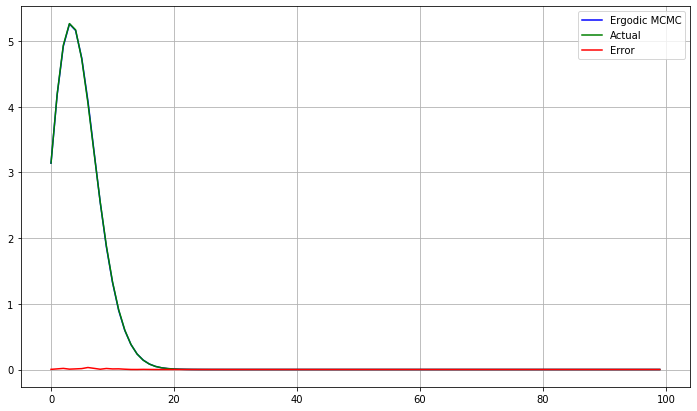

MCMC : 
 [3.13916000e+00 4.17941484e+00 4.91791744e+00 5.25843405e+00
 5.15831346e+00 4.73842675e+00 4.08907275e+00 3.31599265e+00
 2.54608548e+00 1.86862305e+00 1.32638602e+00 9.00589577e-01
 5.94695322e-01 3.80807202e-01 2.35658729e-01 1.42922306e-01
 8.29549648e-02 4.65924855e-02 2.56146849e-02 1.38647166e-02
 7.34247663e-03 3.81529770e-03 1.93931582e-03 9.65468989e-04
 4.66533925e-04 2.23152507e-04 1.04676378e-04 4.84086378e-05
 2.20966068e-05 9.80912569e-06 4.31621149e-06 1.85044619e-06
 7.90177531e-07 3.30957957e-07 1.34964655e-07 5.56486265e-08
 2.26768153e-08 9.05712003e-09 3.52195170e-09 1.37630828e-09
 5.35081135e-10 2.01907515e-10 7.59172258e-11 2.80180113e-11
 1.03946822e-11 3.70217002e-12 1.34655328e-12 4.82362315e-13
 1.70206367e-13 5.87586419e-14 2.02376514e-14 6.96782339e-15
 2.35373074e-15 7.92736513e-16 2.61666468e-16 8.58109016e-17
 2.79880837e-17 8.87949943e-18 2.86932144e-18 9.03319777e-19
 2.85123854e-19 8.96372374e-20 2.79937092e-20 8.63885867e-21
 2.63174190e-21

<Figure size 432x288 with 0 Axes>

In [7]:
delta = 1.0
N = 100 # number of steps to approach equilibrium
samples = 1000 
Omega = 2
Mcmc = []
Actual = []
Error = []
for d in range(1,101):
    nhits = 0
    x = [0 for i in range(d)]  ## start at the centre of th disc. This variable will keep the position of the chain
    R_sq = 0.0  ## this variable keeps the squared distance from 0. It saves some computations to keep it

    for _ in range(N*samples):
        k = r.choice(range(d))  ## choose a jump direction at random
        z = r.uniform(-delta,delta) ## choose a jump size uniformly in (-delta,delta)
        x_prop_k = x[k] + z   ## propose a jump by z in the direction k
        R_sqprop = R_sq - x[k]**2+ x_prop_k**2 ## compute the squared distance from 0 after the proposed jump 
        if R_sqprop < 1.0: 
            R_sq = R_sqprop
            x[k]= x_prop_k   ## if the proposed jump leads to a point in the disc, then jump
        x_d_next = r.uniform(-delta,delta)
        R_sq_new = R_sq + x_d_next**2
        if R_sq_new < 1.0:
            nhits += 1

    result = 2*Omega*(nhits/(N*samples))
    Mcmc.append(result)
    Omega = result
    Actual.append(Vol1(d+1))
    Error.append(abs(result - Vol1(d+1)))


plt.figure(figsize=(12, 7))
plt.plot(Mcmc, color = 'b', label = 'Ergodic MCMC')
plt.plot(Actual, color = 'g', label = 'Actual')
plt.plot(Error, color = 'r', label = 'Error')
plt.legend()
plt.grid()
plt.show()
plt.cla()
plt.clf()
print("MCMC : \n",np.array(Mcmc))
print("Actual : \n",np.array(Actual))
print("Error : \n",np.array(Error))